In [1]:
import numpy as np
import cv2
import glob
import datetime
import os
%matplotlib notebook
import matplotlib.pyplot as plt, mpld3

In [2]:
# read from a csv file
filename = '../records/2018-05-06 03:59:16.251913.csv'
data = np.genfromtxt(filename, delimiter=',')

In [3]:
len(data[:,0])

364502

In [4]:
left = data[26:,0]
right = data[26:,1]

In [5]:
time_array = data[26:,-1]

In [6]:
print(len(left))
print(len(right))
print(len(time_array))

364476
364476
364476


In [7]:
time_in_hours = time_array / (60*60)

<IPython.core.display.Javascript object>


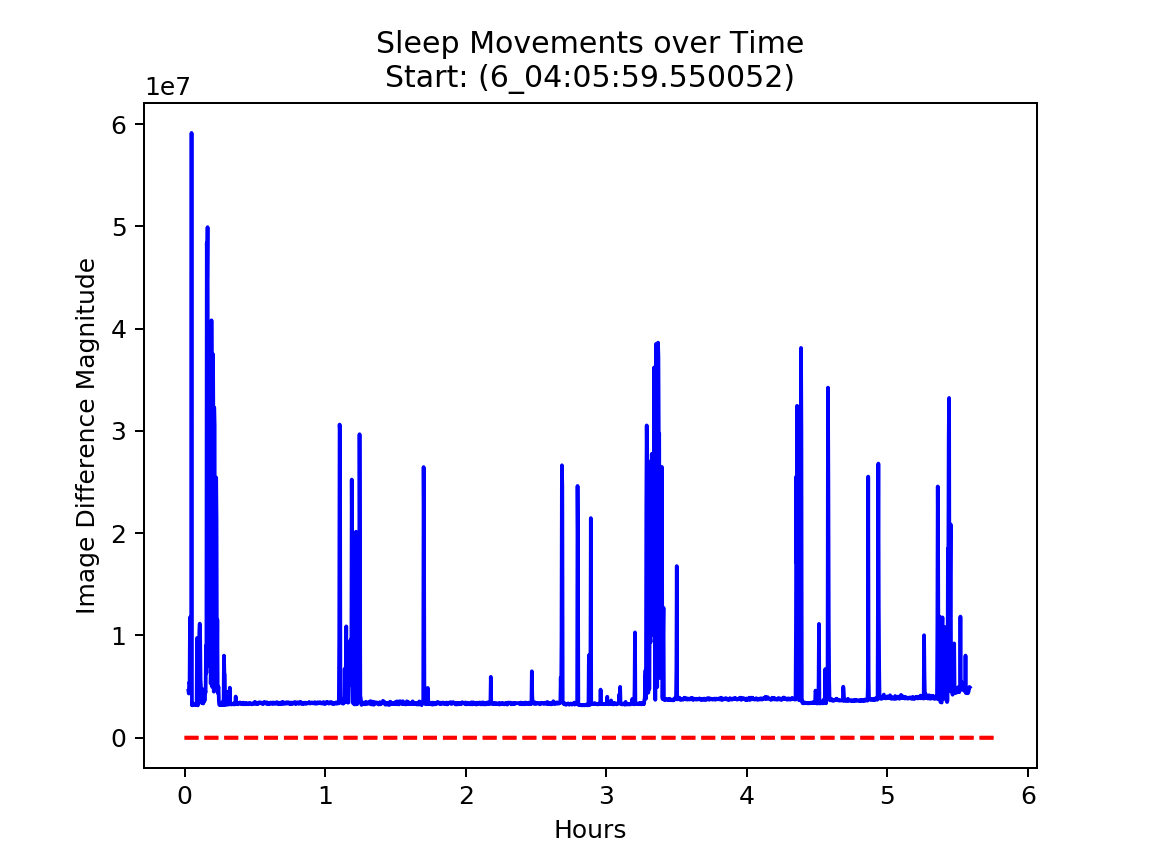

In [8]:
# red dashes, blue squares and green triangles
plt.plot(time_in_hours, left, 'r--')
plt.title("Left Eye")
plt.show()

In [9]:
# red dashes, blue squares and green triangles
plt.plot(time_in_hours, right, 'r--')
plt.title("Right Eye")
plt.show()

In [10]:
cwd = "/Users/ethanweber/Documents/MIT_Classes/Sophomore_Spring2018/MAS.600/hackyodreamz/camera/webcam"


In [11]:
folder = "/data/5-6-2018_0"
path = cwd + folder
filenames = sorted(glob.glob(os.path.join(path,'*.png')))


In [12]:
images = []
for f in filenames:
    images.append(cv2.imread(f))

In [13]:
images_np = np.asarray(images)
time_array = np.linspace(0, 10*len(images_np), len(images_np)) / (60*60)


In [14]:
diff_array = []
for i in range(1,len(images_np)):
    gray1 = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(images[i-1], cv2.COLOR_BGR2GRAY)
    d = cv2.absdiff(gray1, gray2)
    val = np.sum(d)
    diff_array.append(val)
diff_np = np.asarray(diff_array)

In [15]:
plt.plot(time_array[10:-1], diff_np[10:], 'b')
name = filenames[0][filenames[0].rfind('/')+10:-4]
plt.title('Sleep Movements over Time\nStart: ({})'.format(name))
plt.ylabel("Image Difference Magnitude")
plt.xlabel("Hours")
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.plot(time_array[10:-1], diff_np[10:], 'b--', label='body')

ax.set_ylabel('body mov. (mag)', color='b')

ax2 = ax.twinx()
ax2.plot(time_in_hours, left, 'g--', label='left')
ax2.plot(time_in_hours, right, 'r--', label='right')
ax2.set_ylabel('eye mov. (mag)', color='black')

legend = ax2.legend(shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('#FFFFFF')

name = filenames[0][filenames[0].rfind('/')+12:-4]
plt.title('Body and Eye Movements vs. Time\nStart: ({})'.format(name) + "\nMay 5-6 Night")
plt.xlabel("time (sec)")
plt.show()
# mpld3.show()

In [17]:
# 20 hz for the sensor readings
# (20 readings / sec) * (60 sec / min) * (60 min / hr)

In [18]:
def get_index(hour):
    return int(hour*20*60*60 // 1)

In [19]:
get_index(0.5)

36000

In [20]:
get_index(.6)

43200

In [21]:
plt.plot(left[36000:43200])